In [1]:
#Importation des bibliothéques 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder

Chargement du fichier Financiel_anomaly_data.csv puis affichage de quelques données

In [2]:
df=pd.read_csv('financial_anomaly_data.csv')

In [3]:
df.head()

,Timestamp,TransactionID,AccountID,Amount,Merchant,TransactionType,Location
0,01-01-2023 08:00,TXN1127,ACC4,95071.92,MerchantH,Purchase,Tokyo
1,01-01-2023 08:01,TXN1639,ACC10,15607.89,MerchantH,Purchase,London
2,01-01-2023 08:02,TXN872,ACC8,65092.34,MerchantE,Withdrawal,London
3,01-01-2023 08:03,TXN1438,ACC6,87.87,MerchantE,Purchase,London
4,01-01-2023 08:04,TXN1338,ACC6,716.56,MerchantI,Purchase,Los Angeles


Vérification des valeurs nulles du jeu de données

In [6]:
#Valeurs nulles dans chaque colonne
print(df.isnull().sum())

#description en statistiques
print(df.describe())

Timestamp          481
TransactionID      481
AccountID          481
Amount             481
Merchant           481
TransactionType    481
Location           481
dtype: int64
              Amount
count  216960.000000
mean    50090.025108
std     29097.905016
min        10.510000
25%     25061.242500
50%     50183.980000
75%     75080.460000
max    978942.260000


Distribution du montant des transactions

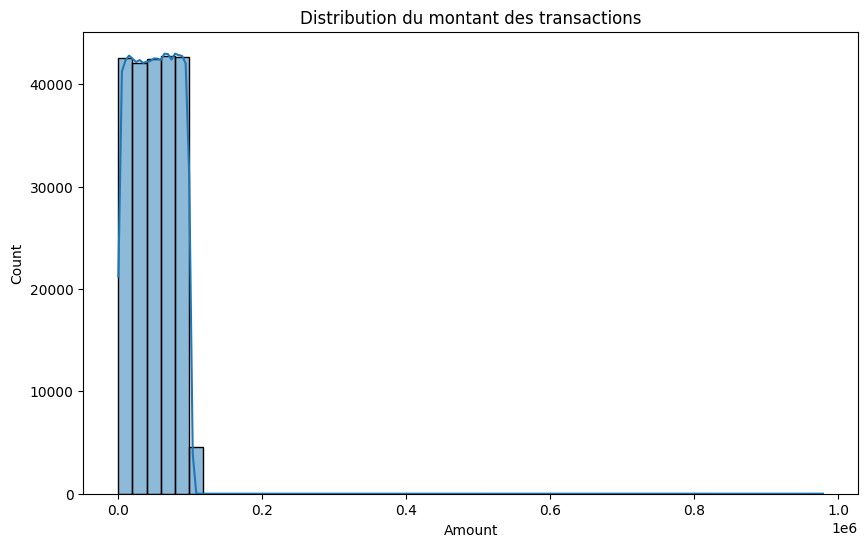

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Distribution du montant des transactions")
plt.show()

Distribution des types de transaction

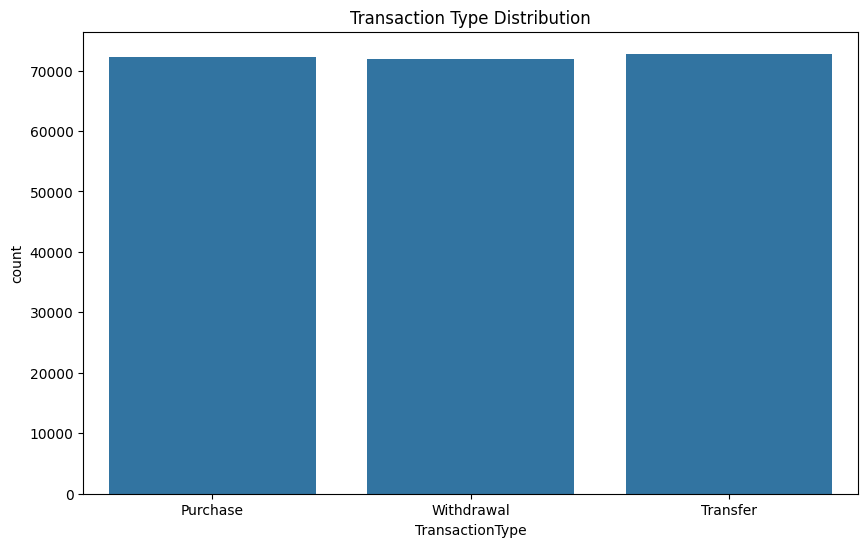

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TransactionType', data=df)
plt.title('Transaction Type Distribution')
plt.show()

Noms des colonnes dans mon dataframe

In [13]:
print(df.columns)

Index(['Timestamp', 'TransactionID', 'AccountID', 'Amount', 'Merchant',
       'TransactionType', 'Location'],
      dtype='object')


Convertion de Timestamp à Datetime pour avoir un bon format

In [ ]:

df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')

Utilisation du One Hot Encoder pour les variables catégorielles

In [16]:
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_cols = encoder.fit_transform(df[['Merchant', 'TransactionType', 'Location']])
feature_names = encoder.get_feature_names_out(['Merchant', 'TransactionType', 'Location'])
encoded_df = pd.DataFrame(encoded_cols, columns=feature_names)

c:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Suppression des colonnes non encodés et remplacement par les nouvelles colonnes encodées.

In [ ]:
df = pd.concat([df, encoded_df], axis = 1)
df.drop(['Merchant', 'TransactionType', 'Location'], axis=1, inplace=True)
df.dropna(inplace=True)

Entrainement des données avec l'Isolation Forest pour identifier les transactions frauduleuses 

In [27]:
model = IsolationForest(contamination=0.2, random_state=42)
model.fit(df[['Amount'] + list(encoded_df.columns)])

IsolationForest(contamination=0.2, random_state=42)

Prédiction des transactions frauduleuses 

In [28]:
df['Anomaly'] = model.predict(df[['Amount'] + list(encoded_df.columns)])

Visualisation des résultats de la détection des anomalies en fonction de la colonne Amount

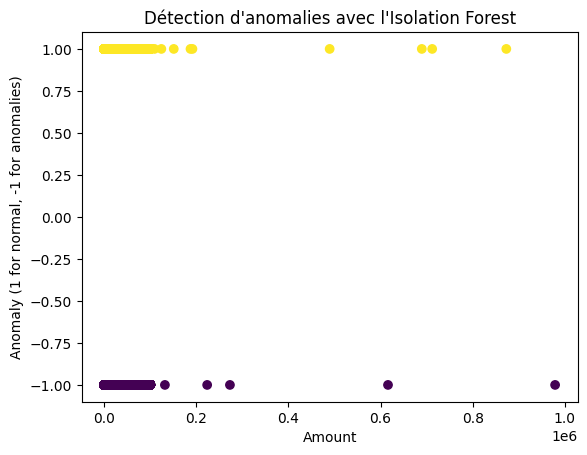

In [30]:

plt.scatter(df['Amount'], df['Anomaly'], c=df['Anomaly'], cmap='viridis')
plt.title("Détection d'anomalies avec l'Isolation Forest")
plt.xlabel('Amount')
plt.ylabel('Anomaly (1 for normal, -1 for anomalies)')
plt.show()

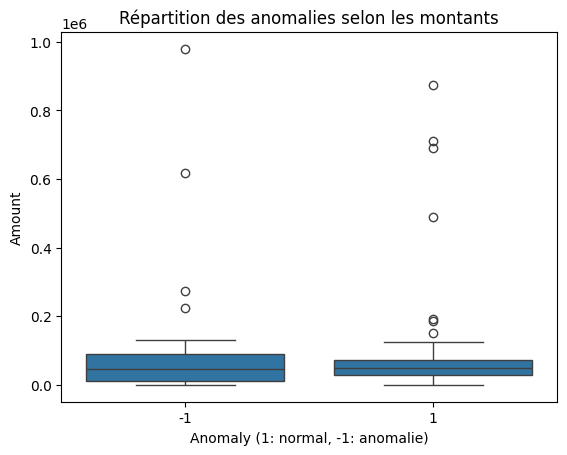

In [31]:
sns.boxplot(x='Anomaly', y='Amount', data=df)
plt.title('Répartition des anomalies selon les montants')
plt.xlabel('Anomaly (1: normal, -1: anomalie)')
plt.ylabel('Amount')
plt.show()